# Fifa 22 dataset cleaning and transformation

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime


In [2]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df_22 = pd.read_csv("players_22.csv")
df_22.head(10)

C:\Users\Legion\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


In [4]:
df_22_cp = df_22.copy()

In [5]:
df_22_cp["dob"]

0        24-06-1987
1        21-08-1988
2        05-02-1985
3        05-02-1992
4        28-06-1991
            ...    
19234    02-01-1999
19235    18-03-2002
19236    07-02-2000
19237    23-04-2002
19238    06-02-2002
Name: dob, Length: 19239, dtype: object

In [6]:
df_22_cp

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [7]:
df_22_cp['dob'] = pd.to_datetime(df_22_cp['dob'])

df_22_cp['day'] = df_22_cp['dob'].dt.day
df_22_cp['month'] = df_22_cp['dob'].dt.month
df_22_cp['year'] = df_22_cp['dob'].dt.year


In [8]:
df_22_cp[["height_cm",'weight_kg']].head(10)

,height_cm,weight_kg
0,170,72
1,185,81
2,187,83
3,175,68
4,181,70
5,188,87
6,182,73
7,193,93
8,187,85
9,188,89


In [9]:
df_22_cp.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
nation_logo_url     object
nation_flag_url     object
day                  int64
month                int64
year                 int64
Length: 113, dtype: object

In [10]:
df_22_cp["player_traits"]

0        Finesse Shot, Long Shot Taker (AI), Playmaker ...
1        Solid Player, Finesse Shot, Outside Foot Shot,...
2        Power Free-Kick, Flair, Long Shot Taker (AI), ...
3        Injury Prone, Flair, Speed Dribbler (AI), Play...
4        Injury Prone, Leadership, Early Crosser, Long ...
                               ...                        
19234                                                  NaN
19235                                                  NaN
19236                                                  NaN
19237                                                  NaN
19238                                                  NaN
Name: player_traits, Length: 19239, dtype: object

In [11]:
for i in df_22_cp.columns:
    print(i)

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


In [12]:
df_22_cp["weight_kg"].dtype

dtype('int64')

In [13]:
df_22_cp["height_cm"].dtype

dtype('int64')

# 1. Do the height and weight column have the appropriate data types?

The height and weight column data type is 'int64', and the height and weight columns are supposed to be either float or int values. therefore, both the columns have appropriate data types.

In [14]:
df_22_cp["height_cm"].dtype

dtype('int64')

In [15]:
df_22_cp["weight_kg"].dtype

dtype('int64')

# 2.Can you seperate the joined column into year, month, and day columns?

In [16]:
df_22_cp[["dob",'year','month','day']]

,dob,year,month,day
0,1987-06-24,1987,6,24
1,1988-08-21,1988,8,21
2,1985-05-02,1985,5,2
3,1992-05-02,1992,5,2
4,1991-06-28,1991,6,28
...,...,...,...,...
19234,1999-02-01,1999,2,1
19235,2002-03-18,2002,3,18
19236,2000-07-02,2000,7,2
19237,2002-04-23,2002,4,23


# 3. can you clean and transform the value, wage and release clause columns into columns of integers? 

In [17]:
#lets first take a look at value, wage and release clause column
df_22_cp[["value_eur", "wage_eur", "release_clause_eur"]].head(10)

,value_eur,wage_eur,release_clause_eur
0,78000000.0,320000.0,144300000.0
1,119500000.0,270000.0,197200000.0
2,45000000.0,270000.0,83300000.0
3,129000000.0,270000.0,238700000.0
4,125500000.0,350000.0,232200000.0
5,112000000.0,130000.0,238000000.0
6,194000000.0,230000.0,373500000.0
7,13500000.0,86000.0,22300000.0
8,99000000.0,250000.0,210400000.0
9,129500000.0,240000.0,246100000.0


##### so, before converting columns from float to int, we have to check for null values, to avoid computation error

In [18]:
df_22_cp["value_eur"].isna().sum()
    

74

In [19]:
df_22_cp["wage_eur"].isna().sum()

61

In [20]:
df_22_cp["release_clause_eur"].isna().sum()

1176

In [21]:
df_22_cp["value_eur"].describe()

count    1.916500e+04
mean     2.850452e+06
std      7.613700e+06
min      9.000000e+03
25%      4.750000e+05
50%      9.750000e+05
75%      2.000000e+06
max      1.940000e+08
Name: value_eur, dtype: float64

### as you can see, there are some null values. we have to fill these values with either mean/median/mode based on the type of data.

In [22]:
#fill the null values of value, wage and release columns with mean value
#before filling null values: value = 74 wage = 61 release = 1176
mean_value = df_22_cp["value_eur"].mean()
mean_wage = df_22_cp['wage_eur'].mean()
mean_release = df_22_cp["release_clause_eur"].mean()
df_22_cp["value_eur"].fillna(value=mean_value,inplace=True)

In [23]:
df_22_cp["value_eur"].isna().sum()

0

In [24]:
df_22_cp["wage_eur"].fillna(value=mean_wage,inplace=True)

In [25]:
df_22_cp["wage_eur"].isna().sum()

0

In [26]:
df_22_cp["release_clause_eur"].fillna(value = mean_release , inplace= True)
df_22_cp["release_clause_eur"].isna().sum()

0

In [27]:
#now that we have filled the null values with mean, we are ready to convert the column types from float to int
df_22_cp["value_eur"] = df_22_cp['value_eur'].apply(np.int64)
df_22_cp["wage_eur"] = df_22_cp['wage_eur'].apply(np.int64)
df_22_cp["release_clause_eur"] = df_22_cp['release_clause_eur'].apply(np.int64)

In [28]:
df_22_cp[["value_eur", "wage_eur", "release_clause_eur"]].head(10)

,value_eur,wage_eur,release_clause_eur
0,78000000,320000,144300000
1,119500000,270000,197200000
2,45000000,270000,83300000
3,129000000,270000,238700000
4,125500000,350000,232200000
5,112000000,130000,238000000
6,194000000,230000,373500000
7,13500000,86000,22300000
8,99000000,250000,210400000
9,129500000,240000,246100000


In [29]:
df_22_cp[["value_eur","wage_eur","release_clause_eur"]].dtypes

value_eur             int64
wage_eur              int64
release_clause_eur    int64
dtype: object

###  we can see the type of column changed from float to int

In [30]:
    df_22_cp["player_positions"]

0        RW, ST, CF
1                ST
2            ST, LW
3           LW, CAM
4           CM, CAM
            ...    
19234           CDM
19235            CM
19236            CM
19237            ST
19238           CAM
Name: player_positions, Length: 19239, dtype: object

In [34]:
# st_pos = df_22_cp[df_22_cp['player_positions']]
# print(st_pos[["short_name",'player_positions']].head(10))
st_pos = df_22_cp[df_22_cp["player_positions"].str.contains('ST')]
st_pos
print(st_pos[["short_name",'player_positions']].head(10))

           short_name player_positions
0            L. Messi       RW, ST, CF
1      R. Lewandowski               ST
2   Cristiano Ronaldo           ST, LW
6           K. Mbappé           ST, LW
9             H. Kane               ST
11         K. Benzema           CF, ST
23          L. Suárez               ST
25          R. Lukaku               ST
29         E. Haaland               ST
30          S. Agüero               ST


In [35]:
st_overall_90 = st_pos[st_pos['overall']> 80]
print( pd.DataFrame(st_overall_90[['short_name','player_positions','power_shot_power',"power_stamina",'overall']]))

            short_name player_positions  power_shot_power  power_stamina  \
0             L. Messi       RW, ST, CF                86             72   
1       R. Lewandowski               ST                90             76   
2    Cristiano Ronaldo           ST, LW                94             77   
6            K. Mbappé           ST, LW                86             88   
9              H. Kane               ST                91             83   
..                 ...              ...               ...            ...   
349            Morales           ST, LM                82             78   
354   D. Calvert-Lewin               ST                79             80   
358     Gonçalo Guedes       LM, ST, CF                84             74   
369      Louri Beretta           ST, CF                85             52   
371        Oswaldinato               ST                79             72   

     overall  
0         93  
1         92  
2         91  
6         91  
9         90

In [36]:
drop_columns = ["player_face_url","player_url","club_logo_url","club_flag_url","nation_logo_url","nation_flag_url","weight_kg","club_team_id",
               "player_tags","real_face","work_rate",'body_type','international_reputation',"skill_moves","nation_jersey_number","nation_team_id",
                "nationality_id","club_contract_valid_until","club_joined","club_loaned_from","club_jersey_number","league_level","physic",
                "attacking_crossing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve",
                "skill_fk_accuracy","skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility",
                "movement_reactions","movement_balance","power_jumping","power_strength","power_long_shots","mentality_aggression","mentality_interceptions",
                'mentality_positioning','mentality_vision',"mentality_penalties",'mentality_composure',"defending_marking_awareness",
                'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
                'goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed','ls','rs','lf','cf',"rf","lam","cam","ram","lm","lcm","cm","rcm","rm",
                "lwb","ldm",'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','player_face_url','club_logo_url','club_flag_url','nation_logo_url',
                'nation_flag_url'
               ]

In [37]:

st_dropped_90 = st_overall_90.drop(columns= drop_columns,axis=1)

In [38]:
st_dropped_90.head(10)

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,defending,attacking_finishing,power_shot_power,power_stamina,st,lw,rw,day,month,year
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000,320000,34,1987-06-24,...,34.0,95,86,72,89+3,92,92,24,6,1987
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000,270000,32,1988-08-21,...,44.0,95,90,76,90+2,85,85,21,8,1988
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000,270000,36,1985-05-02,...,34.0,95,94,77,90+1,88,88,2,5,1985
6,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000,230000,22,1998-12-20,...,36.0,93,86,88,89+3,90,90,20,12,1998
9,202126,H. Kane,Harry Kane,ST,90,90,129500000,240000,27,1993-07-28,...,47.0,94,91,83,88+2,84,84,28,7,1993
11,165153,K. Benzema,Karim Benzema,"CF, ST",89,89,66000000,350000,33,1987-12-19,...,39.0,90,85,78,87+2,85,85,19,12,1987
23,176580,L. Suárez,Luis Alberto Suárez Díaz,ST,88,88,44500000,135000,34,1987-01-24,...,47.0,93,89,78,87+1,84,84,24,1,1987
25,192505,R. Lukaku,Romelu Lukaku Menama,ST,88,88,93500000,260000,28,1993-05-13,...,39.0,92,89,71,87+1,81,81,13,5,1993
29,239085,E. Haaland,Erling Braut Haaland,ST,88,93,137500000,110000,20,2000-07-21,...,45.0,94,94,82,87+3,80,80,21,7,2000
30,153079,S. Agüero,Sergio Leonel Agüero del Castillo,ST,87,87,51000000,260000,33,1988-02-06,...,33.0,93,90,62,86+1,83,83,6,2,1988


In [39]:
from bokeh.plotting import figure, show

In [40]:
# create a new plot with a title and axis labels
st_top10 = st_dropped_90.iloc[:10]
p = figure(title="overall ranking", x_axis_label="Names", y_axis_label='Overall')

In [41]:
st_top10

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,defending,attacking_finishing,power_shot_power,power_stamina,st,lw,rw,day,month,year
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000,320000,34,1987-06-24,...,34.0,95,86,72,89+3,92,92,24,6,1987
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000,270000,32,1988-08-21,...,44.0,95,90,76,90+2,85,85,21,8,1988
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000,270000,36,1985-05-02,...,34.0,95,94,77,90+1,88,88,2,5,1985
6,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000,230000,22,1998-12-20,...,36.0,93,86,88,89+3,90,90,20,12,1998
9,202126,H. Kane,Harry Kane,ST,90,90,129500000,240000,27,1993-07-28,...,47.0,94,91,83,88+2,84,84,28,7,1993
11,165153,K. Benzema,Karim Benzema,"CF, ST",89,89,66000000,350000,33,1987-12-19,...,39.0,90,85,78,87+2,85,85,19,12,1987
23,176580,L. Suárez,Luis Alberto Suárez Díaz,ST,88,88,44500000,135000,34,1987-01-24,...,47.0,93,89,78,87+1,84,84,24,1,1987
25,192505,R. Lukaku,Romelu Lukaku Menama,ST,88,88,93500000,260000,28,1993-05-13,...,39.0,92,89,71,87+1,81,81,13,5,1993
29,239085,E. Haaland,Erling Braut Haaland,ST,88,93,137500000,110000,20,2000-07-21,...,45.0,94,94,82,87+3,80,80,21,7,2000
30,153079,S. Agüero,Sergio Leonel Agüero del Castillo,ST,87,87,51000000,260000,33,1988-02-06,...,33.0,93,90,62,86+1,83,83,6,2,1988


In [42]:
# add a line renderer with legend and line thickness to the plot
p.line(st_dropped_90["short_name"].head(10),st_dropped_90["overall"].head(10) , legend_label="Temp.", line_width=2)

GlyphRenderer(id='1037', ...)

In [44]:
p = figure(x_range=st_top10, height=350, title="Players overall",
           toolbar_location=None, tools="")

p.vbar(x=st_top10, top=st_dropped_90["overall"], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

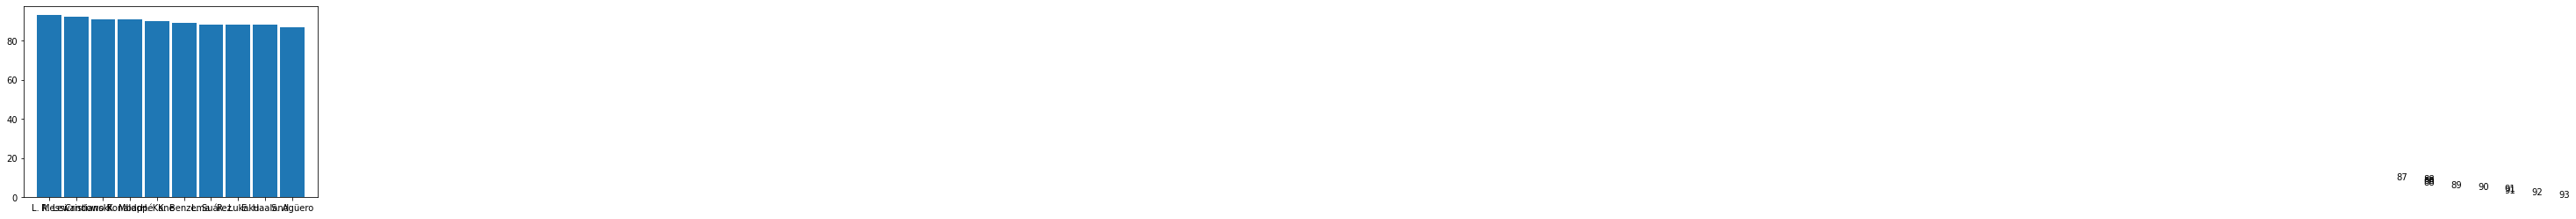

<Figure size 3600x3600 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt

plt.bar(st_top10["short_name"], st_top10["overall"],width=0.9)
 
for index, value in enumerate(st_top10["overall"]):
    plt.text(value, index,
             str(value))
plt.figure(figsize=(50,50))
plt.show()

In [47]:
import seaborn as sns
import seaborn.objects as so

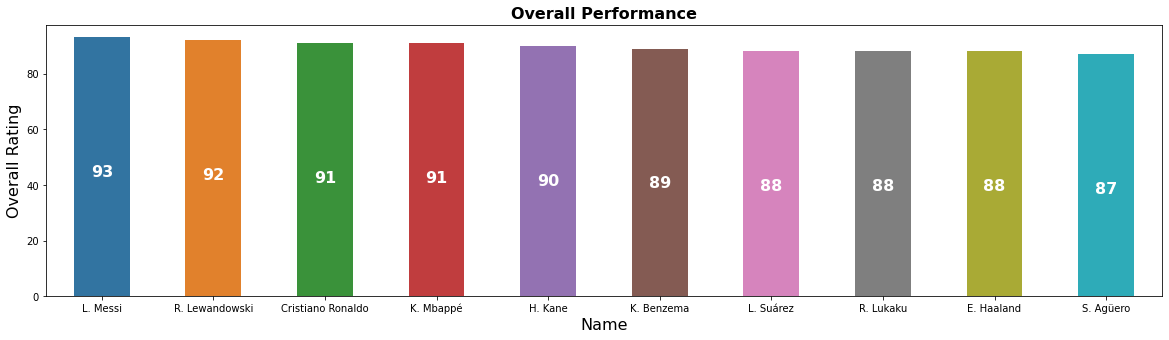

In [48]:

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=st_top10, x=st_top10["short_name"], y=st_top10["overall"],ax = ax,width=0.5)
plt.title(label = "Overall Performance",fontsize=16,weight = 'bold')
plt.xlabel(xlabel="Name",fontsize=16)
plt.ylabel(ylabel="Overall Rating",fontsize=16)
for i,v in enumerate(st_top10["overall"]):
    ax.text(i,v-50,str(v),color = 'white',ha='center',fontsize=16,weight = 'bold')
# pal = sns.color_palette("Greens_d", len(st_top10))
# rank = st_top10["overall"].argsort()
# ax = sns.barplot(x=st_top10["short_name"], y=st_top10["overall"],
#                  data=st_top10,
#                  palette=np.array(pal[::-1])[rank])

# for index, row in st_top10.iterrows():
#     ax.text(index , row,str(row),
#             color='white', ha='center')

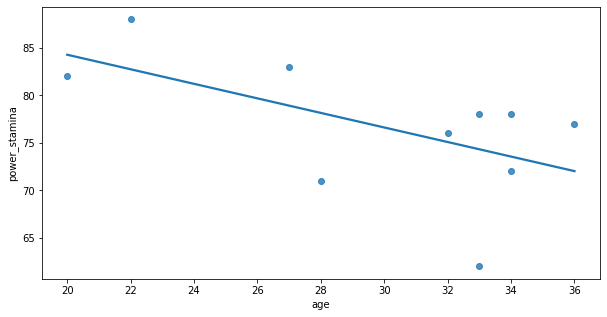

In [175]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.regplot(data = st_top10,x = "age" , y = "power_stamina",ax = ax,ci=None)

# from the above plot we can infer that as age increase the stamina starts to decrease


In [165]:
st_top10.corr()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weak_foot,release_clause_eur,pace,shooting,passing,dribbling,defending,attacking_finishing,power_shot_power,power_stamina,day,month,year
sofifa_id,1.000000,-0.199951,0.242526,0.702980,-0.390190,-0.762646,0.188734,-0.143540,0.702856,0.080621,-0.467644,-0.298915,-0.272283,0.500064,-0.235666,-0.277876,0.351497,0.695869,0.316537,0.749021
overall,-0.199951,1.000000,0.691079,0.260503,0.446594,0.180321,-0.282070,0.235376,0.220235,0.364884,0.511541,0.655976,0.682544,-0.205780,0.569688,-0.226585,0.284790,0.243384,0.405166,-0.206964
potential,0.242526,0.691079,1.000000,0.716778,-0.078410,-0.491273,0.038494,-0.268543,0.685391,0.773502,0.338332,0.087315,0.469706,-0.074460,0.470757,-0.045778,0.635245,0.311246,0.593087,0.470616
value_eur,0.702980,0.260503,0.716778,1.000000,-0.230457,-0.858372,0.312693,-0.038571,0.991461,0.544679,-0.128929,-0.214320,0.009987,0.222914,0.111076,-0.088040,0.679609,0.451212,0.639993,0.834373
wage_eur,-0.390190,0.446594,-0.078410,-0.230457,1.000000,0.518748,-0.409698,0.415599,-0.213594,-0.089578,-0.175206,0.562417,0.494423,-0.582325,-0.208247,-0.537603,-0.331862,-0.212690,0.374829,-0.542292
age,-0.762646,0.180321,-0.491273,-0.858372,0.518748,1.000000,-0.504455,0.302976,-0.859159,-0.494028,0.245388,0.572968,0.330710,-0.313008,0.056906,-0.134112,-0.576765,-0.347220,-0.418912,-0.996639
height_cm,0.188734,-0.282070,0.038494,0.312693,-0.409698,-0.504455,1.000000,-0.189718,0.275170,0.178200,-0.059755,-0.630070,-0.774279,0.564687,-0.139833,0.514603,0.499311,0.040241,0.227985,0.488867
weak_foot,-0.143540,0.235376,-0.268543,-0.038571,0.415599,0.302976,-0.189718,1.000000,0.005254,-0.501775,0.000000,0.627060,0.138086,0.084880,0.000000,-0.225621,0.032613,0.198851,0.000000,-0.320575
release_clause_eur,0.702856,0.220235,0.685391,0.991461,-0.213594,-0.859159,0.275170,0.005254,1.000000,0.535870,-0.201261,-0.180064,0.042780,0.184808,0.034428,-0.150404,0.692955,0.445618,0.651981,0.836905
pace,0.080621,0.364884,0.773502,0.544679,-0.089578,-0.494028,0.178200,-0.501775,0.535870,1.000000,0.059891,-0.180322,0.262566,-0.368073,0.184656,-0.018273,0.431847,-0.133838,0.458029,0.509420
